In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("AutoTel Shared Car Location Dataset\\sample_table.csv").iloc[:60000,:]

In [3]:
#data

####   

# Data Pre-Processing

In [4]:
Year,Month,Date,Hour,Minute,Second=list(),list(),list(),list(),list(),list()
timestamp=pd.Series(data.iloc[:,0])
for i in timestamp:
    Year.append(i[:4])
    Month.append(i[5:7])
    Date.append(i[8:10])
    Hour.append(i[11:13])
    Minute.append(i[14:16])
    Second.append(i[17:24])


In [5]:
Year=pd.Series(Year)
Month=pd.Series(Month)
Date=pd.Series(Date)
Hour=pd.Series(Hour)
Minute=pd.Series(Minute)
Second=pd.Series(Second)

In [6]:
data=pd.concat([Year,Month,Date,Hour,Minute,Second,data],axis=1)
data.columns=['Year','Months','Date','Hour','Minute','Second','Timestamp','Latitude','Longitude','Total_Cars','carsList']

In [7]:
data=data.drop(['Timestamp','carsList'],axis=1)

In [8]:
#data

####   

In [9]:
#data.isnull().sum()

####   

In [10]:
for i in range(len(data)):
    if data.iloc[i,-1]!=0:
        data.iloc[i,-1]=1

In [11]:
for i in range(len(data)):
    if data.iloc[i,-1]!=0 and data.iloc[i,-1]!=1:
        print(data.iloc[i,-1])

In [12]:
#data

####   

In [13]:
X=data.iloc[:,[0,1,2,3,4,5,6,7]]
Y=data.iloc[:,-1]

####   

In [14]:
for i in range(len(X)):
    if " U" in X.iloc[i,-3]:
        print(i)
        print(X.iloc[i,-3])
        X.iloc[i,-3]=X.iloc[i,-3].replace(' U','')

5544
31.27 U


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


39013
52.96 U
47560
31.27 U
49621
31.27 U


In [15]:
#X.iloc[[5544,39013,47560,49621],[-3]]

####   

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
SC=StandardScaler()

In [18]:
X=SC.fit_transform(X)

####   

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

####   

####  

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
log_reg=LogisticRegression()

In [72]:
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
predicted=log_reg.predict(X_test)

####   

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(Y_test,predicted)

0.5595

####   

In [76]:
score=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    log_reg.fit(X_train,Y_train)
    predicted=log_reg.predict(X_test)
    score.append(accuracy_score(Y_test,predicted))

####   

In [77]:
import matplotlib.pyplot as plt

In [78]:
max(score)

0.56225

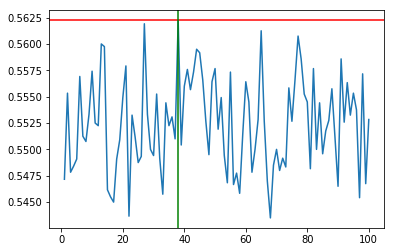

In [79]:
plt.plot(range(1,101),score)
plt.axhline(0.56225,color='red')
plt.axvline(38,color='green')

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=38)
log_reg.fit(X_train,Y_train)
logRegPred,predicted=log_reg.predict(X_test),log_reg.predict(X_test)
accuracy_score(Y_test,predicted)

0.56225

####   

####   

####   

####   

# Decision Tree Classifier 

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
Dtree=DecisionTreeClassifier(max_depth=20,random_state=1)

In [57]:
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [58]:
predicted=Dtree.predict(X_test)

In [59]:
accuracy_score(Y_test,predicted)

0.8643333333333333

In [60]:
score=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    Dtree.fit(X_train,Y_train)
    predicted=Dtree.predict(X_test)
    score.append(accuracy_score(Y_test,predicted))

In [61]:
max(score)

0.8703333333333333

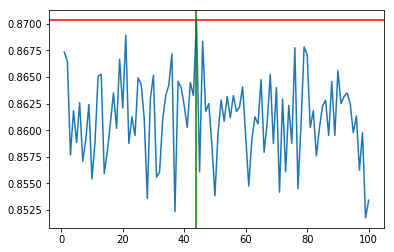

In [62]:
plt.plot(range(1,101),score)
plt.axhline(0.87033,color='red')
plt.axvline(44,color='green')

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=44)
Dtree.fit(X_train,Y_train)
dtPred,predicted=Dtree.predict(X_test),Dtree.predict(X_test)
accuracy_score(Y_test,predicted)

0.8703333333333333

####   

####   

####   

# Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
Rndm=RandomForestClassifier(n_estimators=250,n_jobs=-1,random_state=1,max_depth=20)

In [94]:
Rndm.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [95]:
predicted=Rndm.predict(X_test)

In [96]:
accuracy_score(Y_test,predicted)

0.8588333333333333

In [97]:
score=[]
for i in range(1,60):
    Rndm=RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=1,max_depth=i)
    Rndm.fit(X_train,Y_train)
    predicted=Rndm.predict(X_test)
    score.append(accuracy_score(Y_test,predicted))

In [98]:
max(score)

0.866

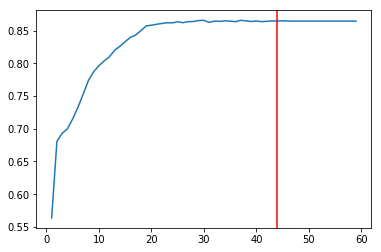

In [99]:
plt.plot(range(1,60),score)
plt.axvline(44,color='red')

In [100]:
score=[]
for i in range(1,60):
    Rndm=RandomForestClassifier(n_estimators=200,n_jobs=-1,max_depth=44,random_state=i)
    Rndm.fit(X_train,Y_train)
    predicted=Rndm.predict(X_test)
    score.append(accuracy_score(Y_test,predicted))

In [101]:
max(score)

0.8684166666666666

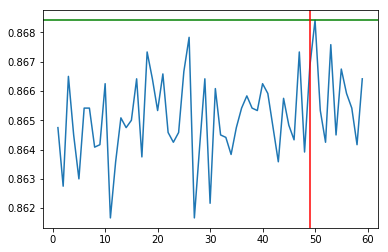

In [102]:
plt.plot(range(1,60),score)
plt.axhline(max(score),color='green')
plt.axvline(49,color='red')

In [103]:
Rndm=RandomForestClassifier(n_estimators=200,n_jobs=-1,max_depth=44,random_state=49)

In [104]:
score=[]
for i in range(1,60):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    Rndm.fit(X_train,Y_train)
    predicted=Rndm.predict(X_test)
    score.append(accuracy_score(Y_test,predicted))

In [105]:
max(score)

0.8726666666666667

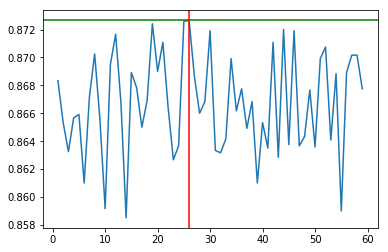

In [106]:
plt.plot(range(1,60),score)
plt.axhline(max(score),color='green')
plt.axvline(26,color='red')

In [107]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=26)
Rndm=RandomForestClassifier(n_estimators=200,n_jobs=-1,max_depth=44,random_state=49)
Rndm.fit(X_train,Y_train)
rfpred,predicted=Rndm.predict(X_test),Rndm.predict(X_test)
accuracy_score(Y_test,predicted)

0.8726666666666667

####   

####   

####   

In [50]:
import seaborn as sns

In [51]:
from sklearn.metrics import confusion_matrix

# Random Forest Heatmap

In [108]:
con_mat=confusion_matrix(Y_test,rfpred)
print(con_mat)

[[4921  442]
 [1086 5551]]


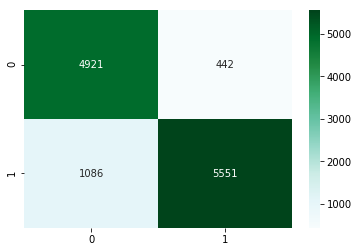

In [109]:
sns.heatmap(con_mat,annot=True,fmt='d',cmap='BuGn')

#    

#  

# Decision Tree Heatmap

In [68]:
con_mat=confusion_matrix(Y_test,dtPred)
print(con_mat)

[[4612  700]
 [ 856 5832]]


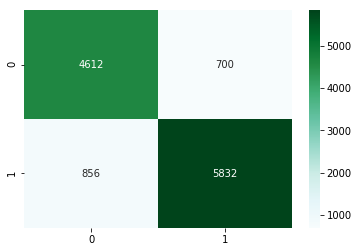

In [69]:
sns.heatmap(con_mat,annot=True,fmt='d',cmap='BuGn')

#    

#    

# Logistic Regression Heatmap

In [90]:
con_mat=confusion_matrix(Y_test,logRegPred)
print(con_mat)

[[1439 3797]
 [1456 5308]]


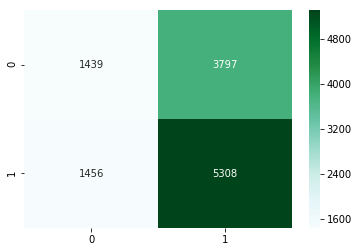

In [91]:
sns.heatmap(con_mat,annot=True,fmt='d',cmap='BuGn')

#   

#  